In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
import random
from random import randint
import math 

## Algorithme génétique pour le probleme du voyageur de commerce

***Probleme :***

. Soit un graphe non orienté complet valué (tous les sommets sont connectés entre
eux avec des aretes à cout positif) contenant n sommets.
. Extraire un circuit Hamiltonien le plus court (passant par tous les sommets du
graphe une et une seule fois)


## ***Quelques indications :***

* .Individu = un circuit quelconque (passage par tous les sommets du graphe)

* . Fonction d'evaluation : La valeur d'adaptation doit etre croissante avec l'adaptation de la solution du probleme .

* . La valeur d'adaptation est inversement proportionnel à la distance du chemin de chaque individu (car on cherche le circuit Hamiltonien le plus court)



### References 

 * http://deptinfo.unice.fr/twiki/pub/Linfo/PlanningDesSoutenances20032004/Radet-Souquet.pdf

 * https://www.ripublication.com/ijcir17/ijcirv13n7_15.pdf
 
 * https://www.researchgate.net/publication/282733130_Analyse_des_performances_d'operateurs_de_mutation_genetique_a_la_resolution_du_Probleme_de_Voyageur_de_Commerce

In [2]:
nb_sommets=5
poids_max=12

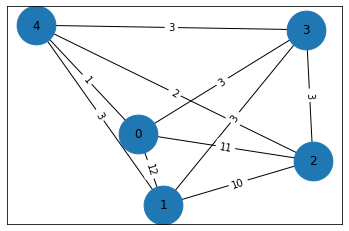

In [3]:
G=nx.Graph()

G.add_weighted_edges_from( (i,j,randint(1,poids_max)) for i in range(nb_sommets) for j in range(i+1,nb_sommets))

G.edges(data=True)

edge_labels=dict([((u,v,),d['weight'])for u,v,d in G.edges(data=True)])
pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw_networkx(G,pos, node_size=1500,edge_cmap=plt.cm.Reds)
pylab.show()  

In [6]:
"""
  Tous les somments sont connectés entre eux avec des aretes à coût positif
  donc on fait l'ensemble des chemin pour chaque sommet
  
"""
def ajouter_les_poids(genes,edge_labels):
    res=[]
    for ind in genes:
        new_ind={}
        for i in range(len(ind)-1):
            if (ind[i],ind[i+1]) not in list(edge_labels.keys()):
                if (ind[i+1],ind[i]) in list(edge_labels.keys()):
                    new_ind[(ind[i+1],ind[i])]=edge_labels[(ind[i+1],ind[i])]
            else:
                new_ind[(ind[i],ind[i+1])]=edge_labels[(ind[i],ind[i+1])]
                
        res.append(new_ind)
    return res
    
def create_population(G,edge_labels):
    genes = []
    for node in G.nodes():
        for n in G.nodes():
            for path in nx.all_simple_paths(G, source=node, target=n):
                if len(path)==len(G.nodes()):
                    genes.append(path)
    return ajouter_les_poids(genes,edge_labels)

In [7]:
create_population(G,edge_labels)

[{(0, 2): 11, (2, 3): 3, (3, 4): 3, (1, 4): 3},
 {(0, 2): 11, (2, 4): 2, (3, 4): 3, (1, 3): 3},
 {(0, 3): 3, (2, 3): 3, (2, 4): 2, (1, 4): 3},
 {(0, 3): 3, (3, 4): 3, (2, 4): 2, (1, 2): 10},
 {(0, 4): 1, (2, 4): 2, (2, 3): 3, (1, 3): 3},
 {(0, 4): 1, (3, 4): 3, (2, 3): 3, (1, 2): 10},
 {(0, 1): 12, (1, 3): 3, (3, 4): 3, (2, 4): 2},
 {(0, 1): 12, (1, 4): 3, (3, 4): 3, (2, 3): 3},
 {(0, 3): 3, (1, 3): 3, (1, 4): 3, (2, 4): 2},
 {(0, 3): 3, (3, 4): 3, (1, 4): 3, (1, 2): 10},
 {(0, 4): 1, (1, 4): 3, (1, 3): 3, (2, 3): 3},
 {(0, 4): 1, (3, 4): 3, (1, 3): 3, (1, 2): 10},
 {(0, 1): 12, (1, 2): 10, (2, 4): 2, (3, 4): 3},
 {(0, 1): 12, (1, 4): 3, (2, 4): 2, (2, 3): 3},
 {(0, 2): 11, (1, 2): 10, (1, 4): 3, (3, 4): 3},
 {(0, 2): 11, (2, 4): 2, (1, 4): 3, (1, 3): 3},
 {(0, 4): 1, (1, 4): 3, (1, 2): 10, (2, 3): 3},
 {(0, 4): 1, (2, 4): 2, (1, 2): 10, (1, 3): 3},
 {(0, 1): 12, (1, 2): 10, (2, 3): 3, (3, 4): 3},
 {(0, 1): 12, (1, 3): 3, (2, 3): 3, (2, 4): 2},
 {(0, 2): 11, (1, 2): 10, (1, 3): 3, (3, 